In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data file
data=pd.read_csv("PS4_GamesSales.csv")

In [24]:
data.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [25]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [26]:
print(data.isnull().sum())

data = data.dropna()

print(data.dtypes)


Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64
Game              object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
dtype: object


In [27]:
data.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [28]:
# 1. Identify the top 5 best-selling games globally
top_5_games = data.nlargest(5, 'Global')[['Game', 'Global']]
top_5_games


,Game,Global
0,Grand Theft Auto V,19.39
1,Call of Duty: Black Ops 3,15.09
2,Red Dead Redemption 2,13.94
3,Call of Duty: WWII,13.40
4,FIFA 18,11.80


In [29]:
# 2. Compare regional sales for each genre
genre_sales = data.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
genre_sales
   


,North America,Europe,Japan,Rest of World
Genre,,,,
Action,48.15,57.51,10.27,20.76
Action-Adventure,22.30,27.79,1.96,9.83
Adventure,5.27,6.08,1.64,2.23
Fighting,8.58,6.11,1.67,2.97
MMO,1.32,1.45,0.20,0.55
Misc,3.64,6.03,0.96,1.85
Music,2.40,1.62,0.17,0.84
Party,0.09,0.47,0.00,0.10
Platform,5.48,8.92,0.67,2.77


In [30]:
# 3. Find the publisher with the highest total global sales

In [31]:
sales_by_publisher = data.groupby('Publisher')['Global'].sum()

# Find the publisher with top sales

top_publisher = sales_by_publisher.idxmax()
print(f"Top Publisher: {top_publisher}")
   

Top Publisher: Activision


In [32]:
# 4. Analyze the year with the highest number of game releases

In [33]:
year_counts = data['Year'].value_counts()

# Find the year with the highest count of game release
top_year = year_counts.idxmax()

# Display the result

print(f"Year with most releases: {top_year}")
   


Year with most releases: 2017.0


In [34]:
# 5. Determine the most popular genre globally


In [35]:
global_genre = data.groupby('Genre')['Global'].sum()
popular_genre = global_genre.idxmax()
print(f"Most popular genre: {popular_genre}")
   


Most popular genre: Action


In [36]:
data.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [37]:
# 6. Identify the game with the highest sales in Japan compared to other regions


In [38]:
top_game_japan = data.nlargest(1, 'Japan')[['Game', 'Japan']]
print(top_game_japan)


                     Game  Japan
24  Monster Hunter: World   2.17


In [39]:
# 7. Correlation between sales in North America and Europe


In [40]:
correlation = data[['North America', 'Europe']].corr()
print(correlation)


               North America    Europe
North America       1.000000  0.810728
Europe              0.810728  1.000000


In [41]:
# 8. Sales growth trend for 'Action' and 'Shooter' genres over the years


In [42]:
action_shooter_data = data[data['Genre'].isin(['Action', 'Shooter'])]
grouped_data = action_shooter_data.groupby(['Year', 'Genre'])['Global'].sum()
action_shooter = grouped_data.unstack()
action_shooter

Genre,Action,Shooter
Year,,
2013.0,1.91,11.13
2014.0,31.97,21.38
2015.0,29.73,36.95
2016.0,25.89,34.34
2017.0,30.51,30.92
2018.0,16.81,0.27
2019.0,0.00,0.00
2020.0,0.00,NaN


In [43]:
# 9. Identify Top publisher in terms of sales for each region


In [44]:
publisher_sales = data.groupby('Publisher')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
top_publishers_region = publisher_sales.idxmax()

top_publishers_region
   



North America     Activision
Europe            Activision
Japan            Square Enix
Rest of World     Activision
dtype: object

In [45]:
data.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [46]:
# 10. Visualizations

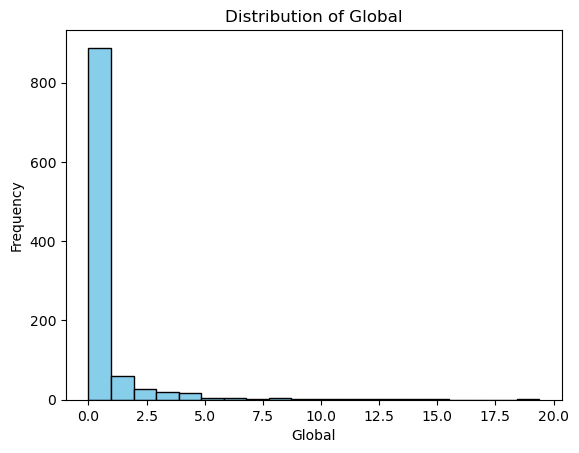

In [76]:
# Plotting the histogram
plt.hist(data['Global'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Global')
plt.xlabel('Global')
plt.ylabel('Frequency')
plt.show()


In [78]:
# Total Sales Comparison for Regions - Bar Chart


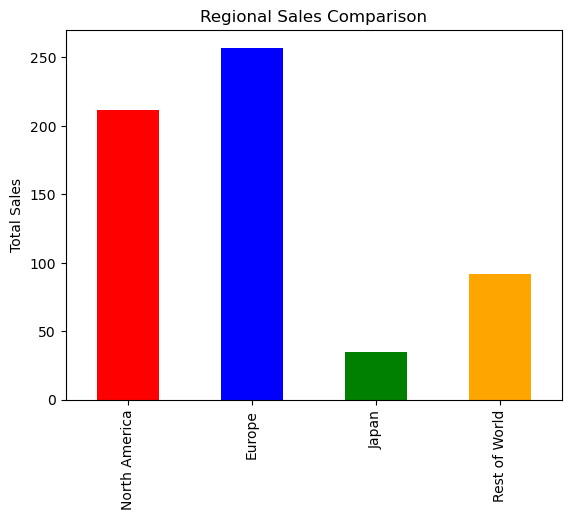

In [84]:
regional_totals = data[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
regional_totals.plot(kind='bar', color=['red', 'blue', 'green', 'orange'])
plt.title('Regional Sales Comparison')
plt.ylabel('Total Sales')
plt.show()


In [86]:
# Share of Global Sales by Genre - Pie Chart


Text(0, 0.5, '')

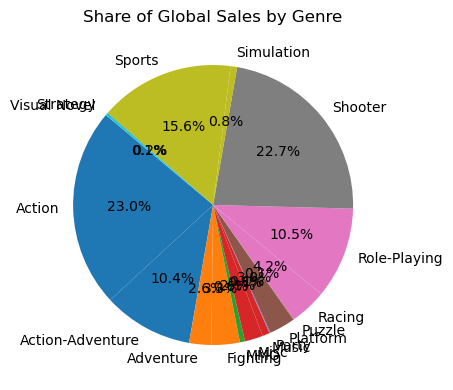

In [94]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 3)
genre_sales = data.groupby('Genre')['Global'].sum()
genre_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab10')
plt.title('Share of Global Sales by Genre')
plt.ylabel('')

In [96]:
# Trend of Global Sales Over the Years - Line Chart


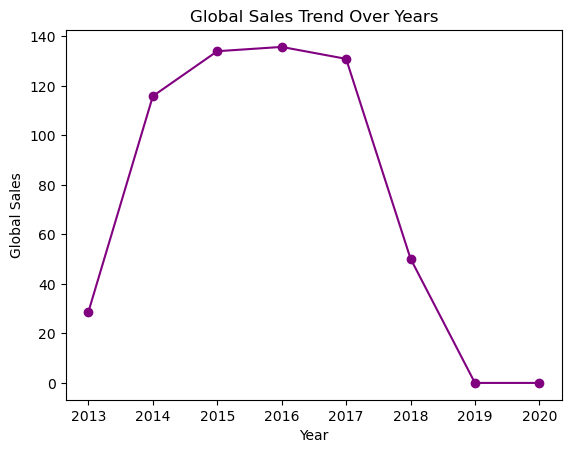

In [100]:
sales_trend = data.groupby('Year')['Global'].sum()
sales_trend.plot(kind='line', marker='o', color='purple')
plt.title('Global Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()
   


In [102]:
# Top 10 Best-Selling Games - Horizontal Bar Chart


Text(0.5, 0, 'Global Sales (millions)')

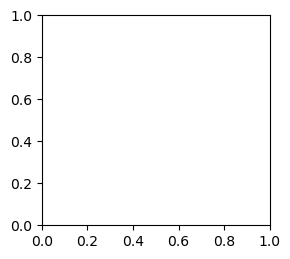

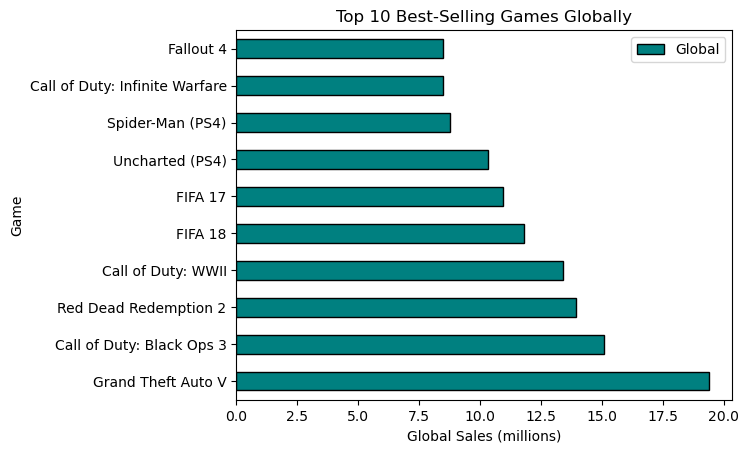

In [110]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 5)
top_10_games = data.nlargest(10, 'Global')[['Game', 'Global']]
top_10_games.plot.barh(x='Game', y='Global', color='teal', edgecolor='black')

plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (millions)')


In [112]:
# Correlation Between Regional Sales - Heatmap


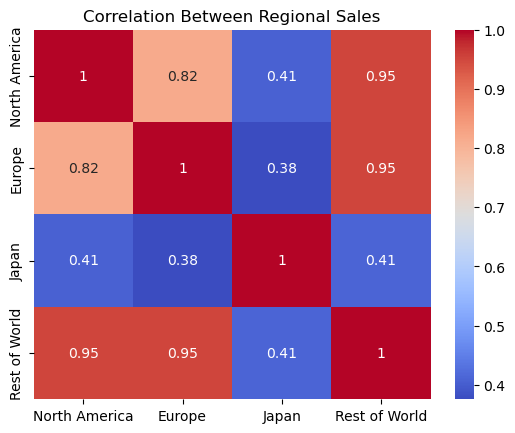

In [114]:
sns.heatmap(data[['North America', 'Europe', 'Japan', 'Rest of World']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Regional Sales')
plt.show()

In [116]:
#Contribution of each genre to regional sales

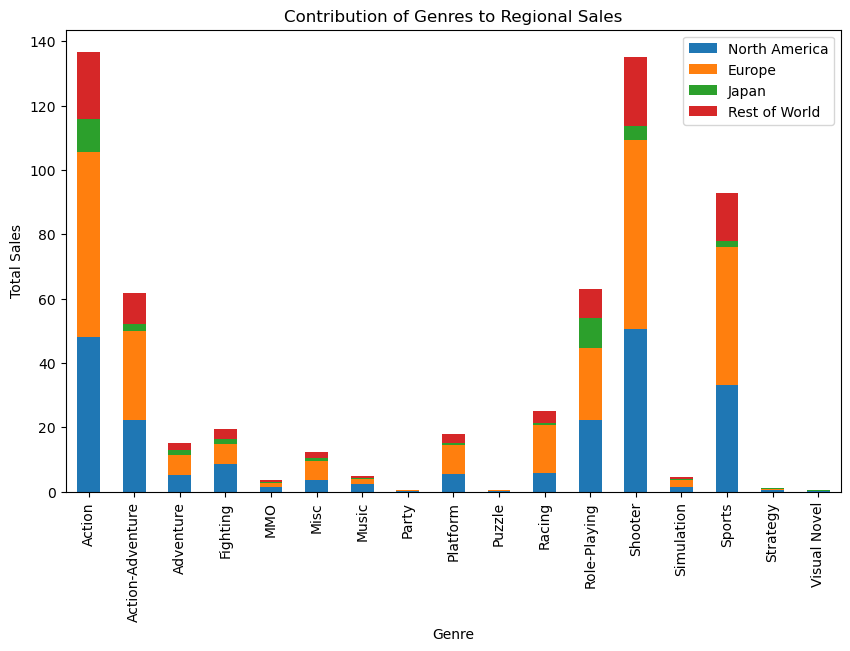

In [124]:
genre_region_sales = data.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
genre_region_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contribution of Genres to Regional Sales')
plt.ylabel('Total Sales')
plt.show()
   

# What Did I Learn from Analyzing the Data? 

In [131]:
#What insights or patterns did you discover during your analysis?

In [ ]:
# ANS: Action and shooter genres excelled globally, while Japan preferred role-playing games


In [ ]:
#Did anything in the data surprise you? If yes, what was it?

In [136]:
# ANS: The strong similarity in sales between North America and Europe, and some genres selling less than expected which is actualy surprising .

In [ ]:
#What challenges did you face, and how did you overcome them?

In [ ]:
# ANS: Missing data, outliers, and complex visualizations

In [ ]:
# How do you think data analysis can help in making real-world decisions?

In [ ]:
# ANS: Data analysis help or guides game development, marketing strategies, investment decisions, etc. Generally, we can say  that over time, data analysis is becoming one of the world's most important and in-demand fields.Skills Improved: visualization, and understanding of gaming industry dynamics.

In [ ]:
# What skills or knowledge do you feel you have improved during this project?"

In [ ]:
 
Real-World Impact: Data analysis help or guides game development, marketing strategies, investment decisions, etc. Generally, we can say that over time, data analysis is becoming one of the world's most important and in-demand fields.
Skills Improved: visualization, and understanding of gaming industry dynamics.







